In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import edhec_risk_kit as erk
ind=erk.get_ind_returns()
er=erk.annualized_rets(ind["1996":"2000"],12)
cov=ind["1996":"2000"].cov()

In [25]:
# code change
import pandas as pd
def optiminal_weights(n_points,er,cov):
    """generate list of weights to run the optimizer to minimize the vol"""
    target_rs=np.linspace(er.min(),er.max(),n_points)
    weights=[minimize_vol(target_return,er,cov) for target_return in target_rs]
    return weights
    
def plot_ef(n_points,er,cov,style=".-"):
    """plot N assets ef"""
    weights=optiminal_weights(n_points,er,cov)
    rets=[erk.portfolio_return(w,er) for w in weights]
    vols=[erk.portfolio_vol(w,cov) for w in weights]
    ef=pd.DataFrame({'Returns':rets,'Volatility':vols})
    return ef.plot.line(x='Volatility',y='Returns',style=style)

<AxesSubplot:xlabel='Volatility'>

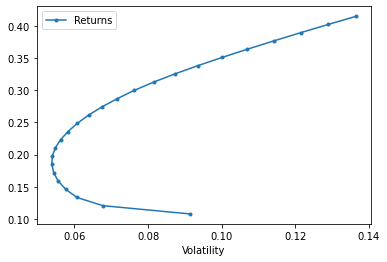

In [26]:
l=['Smoke','Fin','Beer','Coal']
plot_ef(25,er[l],cov.loc[l,l])

<AxesSubplot:xlabel='Volatility'>

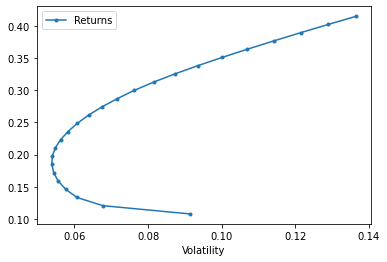

In [27]:
l=['Smoke','Fin','Beer','Coal']
erk.plot_ef(25,er[l],cov.loc[l,l])

In [28]:
##

In [2]:
from scipy.optimize import minimize

<AxesSubplot:xlabel='Volatility'>

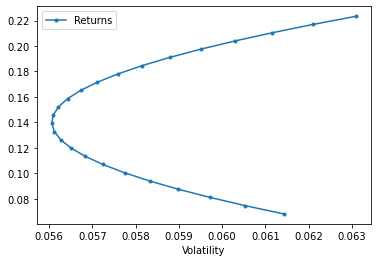

In [4]:
l=['Games','Fin']
erk.plot_ef2(25,er[l],cov.loc[l,l])

In [16]:
import numpy as np
def minimize_vol(target_r,er,cov):
    """target return to W"""
    n=er.shape[0]
    init_guess=np.repeat(1/n,n)
    bounds=((0,1),)*n
    return_is_target={
        'type':'eq',
        'args':(er,),
        'fun':lambda weights, er:target_r-erk.portfolio_return(weights,er)
    }
    weights_sum_to_1={
        'type':'eq',
        'fun':lambda weights: np.sum(weights)-1
    }
    results=minimize(erk.portfolio_vol,init_guess,
                    args=(cov,),method='SLSQP',options={'disp':False},
                    constraints=(return_is_target,weights_sum_to_1),
                    bounds=bounds)
    return results.x

In [20]:
w15=erk.minimize_vol(0.15,er[l],cov.loc[l,l])
vol15=erk.portfolio_vol(w15,cov.loc[l,l])
vol15

0.05616366940670657

In [21]:
w15

array([0.47287631, 0.52712369])

In [19]:
# use 2 asset to test whether the code works